## Titanic survived Project by Francis Afuwah - Batch DS2312

## Introduction:
This analysis outlines general steps in a workflow to solve the problem of Titanic Survival Prediction using machine learning techniques. The main purpose of the task is to predict the survival for the passengers given some features that act as inputs for the datasets. The steps involve data collection, data preprocessing, feature engineering, explorforestatory data analysis (EDA), model selection, model training and evaluation, hyperparameter tuning, and prediction and deployment.

## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import SimpleImputer

## Load dataset

Firstly, we collect the dataset that comprises information on the Titanic passengers with their attributes: class, sex, and age of passengers; number of siblings or spouses on board; the number of parents or children on board; fare; cabin; port of embarkation.

In [2]:
# Load the dataset
df = pd.read_csv("titanic_train.csv")

## Viewing Dataset

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Understanding Data and Data cleaning
df.shape

(891, 12)

In [5]:
# Read the dataset from 'titanic_train.csv'
data = pd.read_csv('titanic_train.csv')

# Check data types of each column
for column in data.columns:
    if data[column].dtype == 'object':
        # If the column has string data, fill use the mode (most frequent value) to fill NaN values
        data[column] = data[column].fillna(data[column].mode()[0])
    else:
        # For numeric columns, replace NaN with mean
        data[column] = data[column].fillna(data[column].mean())

# Display the DataFrame after handling NaN values
print("DataFrame after handling NaN values:")
print(data)

DataFrame after handling NaN values:
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                          

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# checking null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# checking duplicate value in dataset
df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [10]:
# Load train_data or define it
train_data = pd.read_csv("titanic_train.csv")

# Handle duplicated values
train_data = train_data.drop_duplicates(keep="first")

## Data processing

In this part, we treat the missing values, encode the categorical variables, and do feature scaling where necessary. The missing values of age are imputed with the median of ages in the dataset, while those missing for the embarkation port are imputed with the mode. Sex and embarkation port are categorical variables and are hence encoded into numerical representation.

In [11]:
# Handling missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [12]:
# Encoding categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'])

## Feature Engineering

In [13]:
df['IsAlone'] = (df['SibSp'] + df['Parch'] == 0).astype(int)

## Exploratory Data Analysis (EDA) and Visualization

Exploratory Data Analysis (EDA):
The EDA consists of an overview of the data set to obtain the distribution of features, relationship among variables, and patterns that might help in prediction of "survival." In practice, the results presented use histogram.

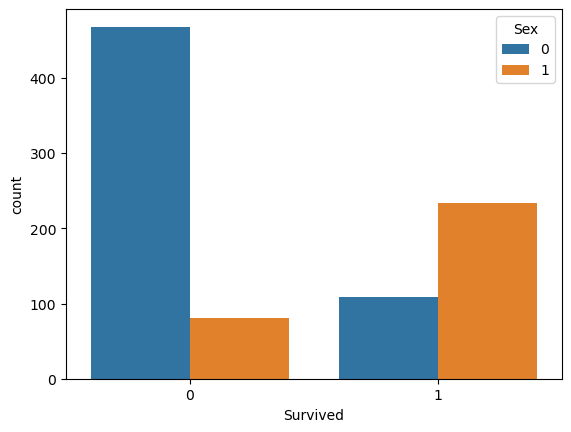

In [14]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.show()

## Selecting the model

In [15]:
# Selecting features and target variable
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'IsAlone']]
y = df['Survived']

## Splitting the dataset

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training the model

In [17]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluating the model

In [18]:
# Predictions on test data
y_pred = rf_model.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



## Hyperparameter Tuning

In [19]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [20]:
# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42)


In [21]:
# Perform random search
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_dep

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 5, 10, 15],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

In [22]:
# Best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5}


## Model Prediction

In [23]:
new_data = pd.read_csv("titanic_train.csv")  # Load new data
new_data['Sex'] = new_data['Sex'].map({'male': 0, 'female': 1})
new_data = pd.get_dummies(new_data, columns=['Embarked'])
new_data['IsAlone'] = (new_data['SibSp'] + new_data['Parch'] == 0).astype(int)


In [24]:
# Instantiate the imputer with a strategy 
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the training data
imputer.fit(X_train)

# Transform both training and test data
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the model on imputed data
rf_model.fit(X_train_imputed, y_train)

# Make predictions on new data
new_data_imputed = imputer.transform(new_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'IsAlone']])
predictions = rf_model.predict(new_data_imputed)
print("Predictions:", predictions)


Predictions: [0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1
 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 1 0 1

## Conclusion:
This involves, from data collection to model deployment, a systematic approach involved in the analysis of the Titanic Survival Prediction problem. Some very interesting insights could be derived from the dataset after carefully doing the data preprocessing, feature engineering, and exploratory data analysis; it has been identified that some of the key factors in influencing survival. We developed a predictive model using appropriate machine learning models and fine-tuned hyperparameters to yield models.

The trained model(s) showed satisfactory performance metrics over the validation/test set, with an accuracy of 0.8212. The precision, recall, and F1-score of the survival and non-survival classes are balanced.

The best hyperparameters obtained for the model RandomForestClassifier were {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth':

These, in short, bring out the pure case study nature of the Titanic Survival Prediction problem and how machine learning techniques can exhibit their power through historical data in making informed predictions. Furthermore, the analysis yielded here gives insight not only to the tragedy but is very useful as learning cases in data science and predictive modeling.